# EastWest Aireline

In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [10]:
xls=pd.ExcelFile("C:/Users/fast/Desktop/Assignment/Clustering/EastWestAirlines.xlsx")
air=pd.read_excel(xls,'data')

In [11]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [12]:
#Normalized data fuction
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [13]:
df_norm=norm_func(air.iloc[:,1:])

In [14]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


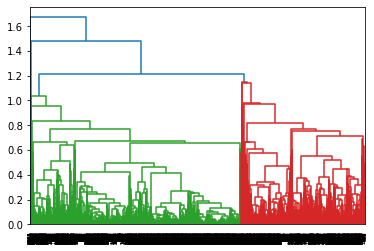

In [18]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [34]:
air.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,Clust
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901,0.177600,-0.145762
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494,-0.179026,0.224575
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256,-0.094479,0.071118
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457,-0.338595,0.248245
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332,0.036321,0.014819
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484,-0.007909,0.019240
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506,-0.368063,0.216061
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893,-0.322684,0.266824
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715,-0.200495,0.166582
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909,-0.229271,0.189768


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_air_df = scaler.fit_transform(air.iloc[:,1:])

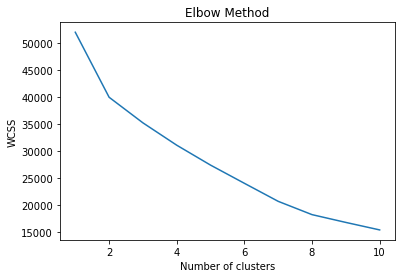

In [64]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_air_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [65]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_air_df)

KMeans(n_clusters=4, random_state=42)

In [66]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1])

In [67]:
air['clusterid_new'] = clusters_new.labels_

In [68]:
clusters_new.cluster_centers_

array([[-0.05696975,  0.11464738, -0.64000046,  0.09022186, -0.06276658,
        -0.40565266, -0.28851289,  0.02914113,  0.05382659,  0.09149778,
         1.30391816, -1.29806017,  1.72274075],
       [-0.31804435, -0.0682154 , -0.62379949,  0.01702473, -0.05251128,
        -0.54442117, -0.50383562, -0.19647005, -0.22043828, -0.2578594 ,
        -0.7669193 ,  0.76322299, -0.79243614],
       [ 1.38946112,  0.87365506,  0.2688748 ,  0.21927102, -0.06276658,
         0.89995311,  1.95174547,  3.91253789,  4.27050047,  0.40374845,
         1.06124189, -1.00365558,  0.7718819 ],
       [ 0.39018233, -0.03611968,  1.27018676, -0.09287453,  0.11989068,
         0.96704696,  0.73939899, -0.09989137, -0.11020318,  0.32299377,
         0.47525499, -0.47807991,  0.34222815]])

In [69]:
air.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,Clust
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,1916.879085,67818.696078,236.102941,1.181373,1.027778,1.000000,7355.839869,8.833333,500.035948,1.575163,4310.485294,1.000000,0.013072,2.980392
1,1,2300.423831,41423.225742,91.758673,1.192559,1.017094,1.002011,3930.003519,6.729512,185.652086,0.539467,3587.755153,0.000000,2.000000,0.104575
2,2,1594.460938,213607.687500,819.945312,2.429688,1.046875,1.000000,38876.867188,30.343750,5937.742188,17.570312,4952.250000,0.882812,0.296875,1.898438
3,3,1657.085827,112672.509449,113.667717,3.803150,1.000787,1.035433,40368.070866,18.677953,318.462992,0.950394,4773.361417,0.595276,0.812598,1.412598


In [70]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,Clust,clusterid_new
0,1,28143,0,1,1,1,174,1,0,0,7000,0,2,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,2,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,2,0,1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0,3,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0,3,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0,1,3
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,2,0,1


In [72]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [73]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
 12  h_clusterid        3999 non-null   int64
 13  Clust              3999 non-null   int32
 14  clusterid_new      3999 non-null   int32
dtypes: int32(2), int64(13)
memory usage: 437.5 KB


In [74]:
df=air.iloc[:,1:14]

In [75]:
df.values

array([[28143,     0,     1, ...,     0,     2,     0],
       [19244,     0,     1, ...,     0,     2,     0],
       [41354,     0,     1, ...,     0,     2,     0],
       ...,
       [73597,     0,     3, ...,     1,     0,     1],
       [54899,     0,     1, ...,     0,     2,     0],
       [ 3016,     0,     1, ...,     0,     2,     0]], dtype=int64)

In [77]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [78]:
x

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  7.63222988e-01, -8.91546915e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  7.63222988e-01, -8.91546915e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  7.63222988e-01, -8.91546915e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -1.31164359e+00, -1.53374992e-02],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  7.63222988e-01, -8.91546915e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  7.63222988e-01, -8.91546915e-01]])

In [81]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [82]:
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [83]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [84]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0
